# Credit Card Behaviour Score Prediction

In the modern financial ecosystem, credit cards are key for consumer transactions, 
offering short-term credit but carrying the risk of default when customers fail to repay.
Financial institutions need to predict potential defaulters to manage this risk.

This project focuses on building a binary classification model to forecast customer default
in the next billing cycle using historical data. The target variable, next_month_default, is defined as:

1: Customer defaults next month.

0: No default occurs.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
train=pd.read_csv("D:\\study\\sem5\\Summer\\Finclub\\Datasets_final\\train_dataset_final1.csv")

In [5]:
train.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,5017,2,0,2,60000,25.0,2,2,2,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,5018,2,1,1,290000,24.0,0,0,-2,-2,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,5019,1,0,2,180000,63.0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,5020,1,1,2,210000,43.0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,5021,2,0,1,280000,32.0,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25247 entries, 0 to 25246
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_ID         25247 non-null  int64  
 1   marriage            25247 non-null  int64  
 2   sex                 25247 non-null  int64  
 3   education           25247 non-null  int64  
 4   LIMIT_BAL           25247 non-null  int64  
 5   age                 25121 non-null  float64
 6   pay_0               25247 non-null  int64  
 7   pay_2               25247 non-null  int64  
 8   pay_3               25247 non-null  int64  
 9   pay_4               25247 non-null  int64  
 10  pay_5               25247 non-null  int64  
 11  pay_6               25247 non-null  int64  
 12  Bill_amt1           25247 non-null  float64
 13  Bill_amt2           25247 non-null  float64
 14  Bill_amt3           25247 non-null  float64
 15  Bill_amt4           25247 non-null  float64
 16  Bill

In [7]:
train=train.drop('Customer_ID',axis=1)
train.describe()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
count,25247.000000,25247.000000,25247.000000,25247.000000,25121.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,...,25247.000000,25247.000000,2.524700e+04,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000,25247.000000
mean,1.551907,0.604111,1.852101,168342.060443,35.438199,-0.042857,-0.159544,-0.190359,-0.241415,-0.282568,...,38806.221029,5718.624966,6.047352e+03,5288.910651,4865.960834,4906.766828,5270.499287,44859.647485,0.362962,0.190399
std,0.522629,0.489050,0.797379,129892.784807,9.174998,1.099315,1.173990,1.172636,1.146753,1.114213,...,59182.792531,16806.842125,2.400962e+04,17851.879609,15979.116544,15860.726852,17960.816915,62819.226119,5.047206,0.392624
min,0.000000,0.000000,0.000000,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-56043.170000,-546.930000,0.000000
25%,1.000000,0.000000,1.000000,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,1241.710000,999.985000,9.219100e+02,399.990000,300.150000,262.365000,130.070000,4858.670000,0.040000,0.000000
50%,2.000000,1.000000,2.000000,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,17102.580000,2145.020000,2.026830e+03,1844.300000,1500.100000,1513.790000,1500.040000,21102.830000,0.090000,0.000000
75%,2.000000,1.000000,2.000000,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,49245.195000,5031.150000,5.000190e+03,4600.640000,4014.990000,4099.890000,4018.780000,57136.580000,0.590000,0.000000
max,3.000000,1.000000,6.000000,1000000.000000,79.000000,8.000000,8.000000,8.000000,7.000000,7.000000,...,961663.620000,873551.980000,1.684259e+06,896040.150000,621000.080000,426529.180000,528666.150000,877313.830000,205.380000,1.000000


In [8]:
print("\nDuplicate Rows:", train.duplicated().sum())


Duplicate Rows: 803


In [9]:
train = train.drop_duplicates()
print("Duplicates removed. New shape:", train.shape)
print("\nDuplicate Rows:", train.duplicated().sum())

Duplicates removed. New shape: (24444, 26)

Duplicate Rows: 0


In [10]:
print("\nMissing Values:")
print(train.isnull().sum())


Missing Values:
marriage                0
sex                     0
education               0
LIMIT_BAL               0
age                   126
pay_0                   0
pay_2                   0
pay_3                   0
pay_4                   0
pay_5                   0
pay_6                   0
Bill_amt1               0
Bill_amt2               0
Bill_amt3               0
Bill_amt4               0
Bill_amt5               0
Bill_amt6               0
pay_amt1                0
pay_amt2                0
pay_amt3                0
pay_amt4                0
pay_amt5                0
pay_amt6                0
AVG_Bill_amt            0
PAY_TO_BILL_ratio       0
next_month_default      0
dtype: int64


In [11]:
train['age']=train['age'].fillna(train['age'].median())


We filled missing age values using the median — a good choice due to skewness.

In [12]:
categorical_cols = ['sex', 'education', 'marriage']
for col in categorical_cols:
    print(f"{col} unique values: {train[col].unique()}")

sex unique values: [0 1]
education unique values: [2 1 3 4 5 6 0]
marriage unique values: [2 1 3 0]


we noticed some unknown values

so, Mapped unknown/invalid categories to (for education to 'others')
and for (marriage to 'single')

In [13]:
train['education'] = train['education'].replace([0, 5, 6], 4)
train['marriage'] = train['marriage'].replace(0, 3)
train.tail()

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
25242,1,1,2,90000,33.0,0,0,0,0,2,...,90042.87,2800.18,3999.97,8000.09,5347.85,3699.98,3128.06,82312.50,0.05,0
25243,1,0,2,60000,49.0,0,0,0,0,0,...,19204.07,22000.17,2187.56,2501.13,2512.09,4004.89,2604.22,41371.67,0.14,1
25244,2,0,1,120000,31.0,-1,-1,-1,-1,-1,...,9834.64,1315.83,1315.60,533.08,4116.08,9834.10,7100.12,3071.83,1.31,1
25245,1,1,4,390000,40.0,0,0,0,0,0,...,199013.32,7636.03,5652.86,5544.67,5532.37,5859.09,6818.14,197278.83,0.03,0
25246,1,1,2,160000,58.0,-1,-1,-1,-1,-1,...,1443.08,1442.81,1443.06,1442.97,1443.31,1442.72,1443.00,1443.00,1.00,0


### Explorative Data Analysis

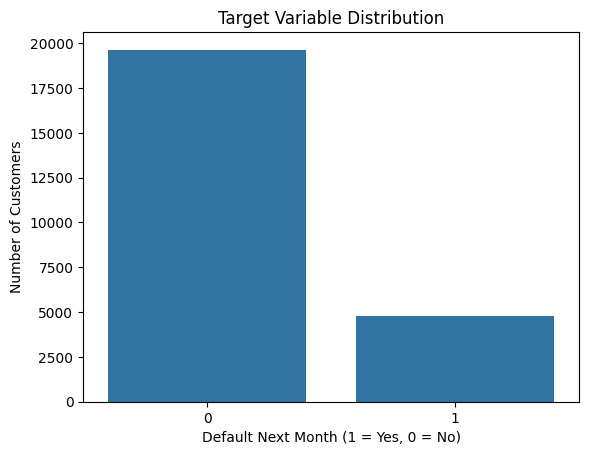

next_month_default
0    0.803346
1    0.196654
Name: proportion, dtype: float64


In [14]:
sns.countplot(data=train, x='next_month_default')
plt.title('Target Variable Distribution')
plt.xlabel('Default Next Month (1 = Yes, 0 = No)')
plt.ylabel('Number of Customers')
plt.show()

# Print class balance
print(train['next_month_default'].value_counts(normalize=True))

target varibale is imbalanced so before training we need to balance it by some technique.

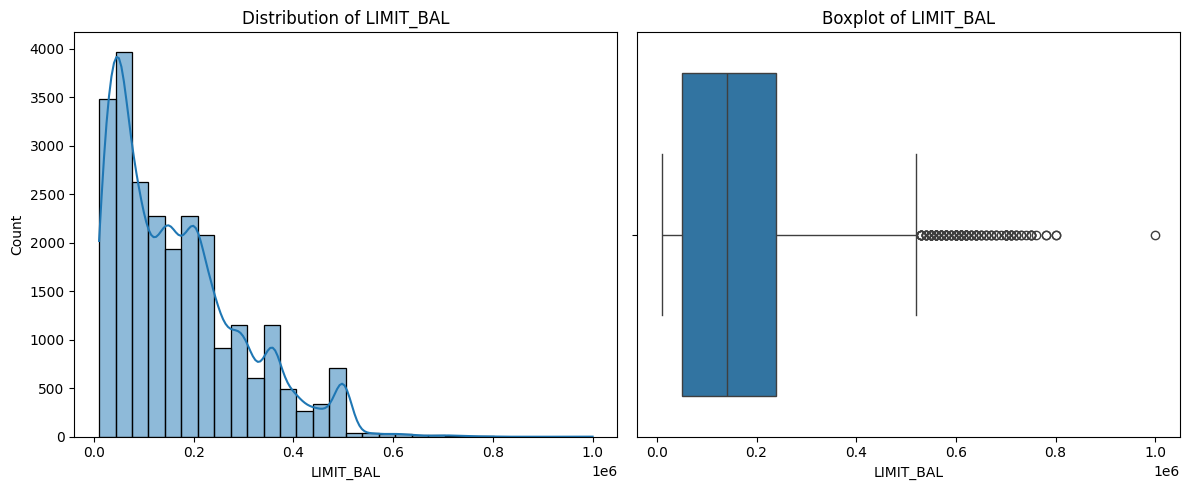

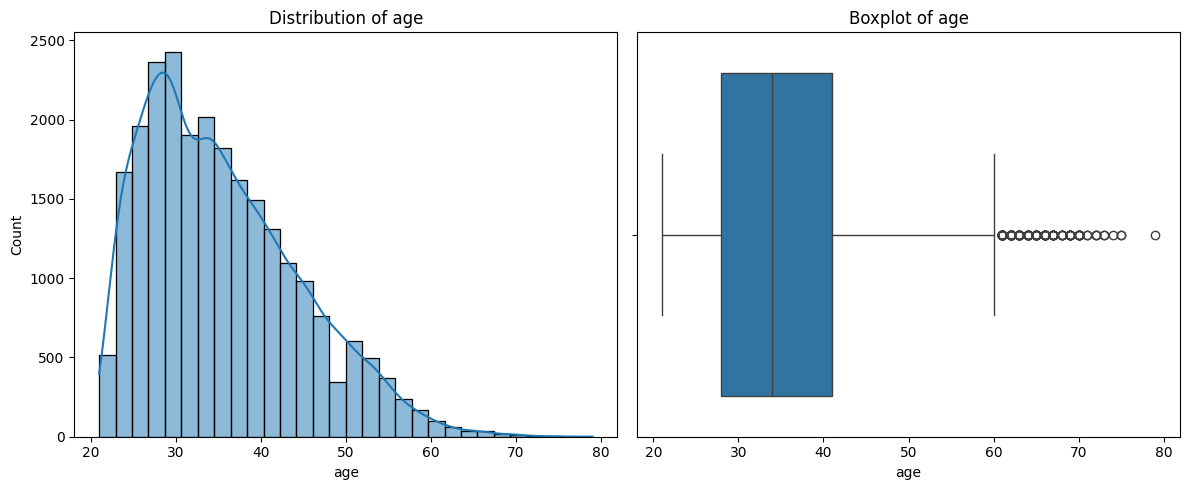

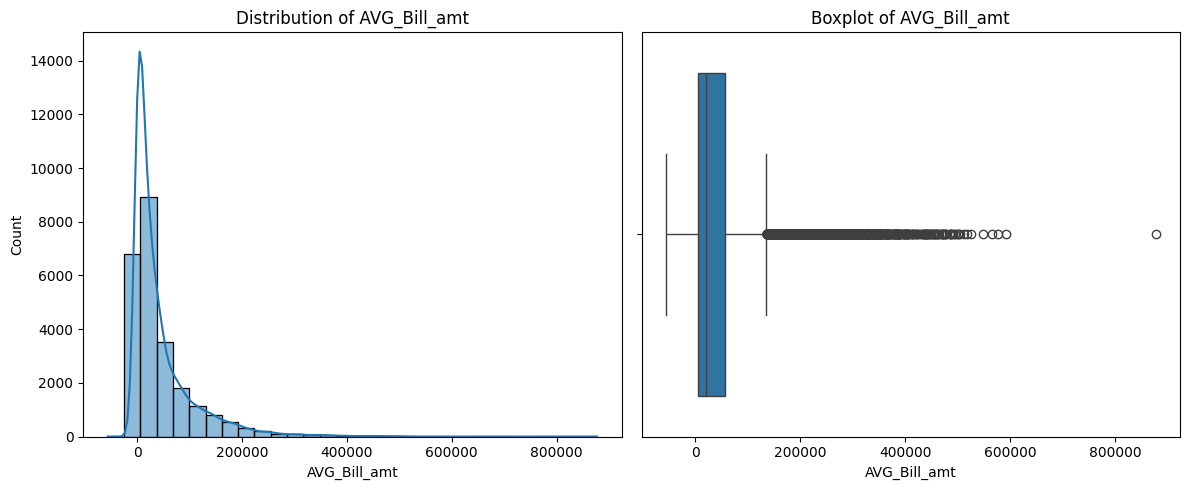

In [15]:
num_cols = ['LIMIT_BAL', 'age', 'AVG_Bill_amt']

for col in num_cols:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(train[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=train[col])
    plt.title(f'Boxplot of {col}')
    
    plt.tight_layout()
    plt.show()

These are right skewed data, so they contain outlier also
we will deal with outliers after

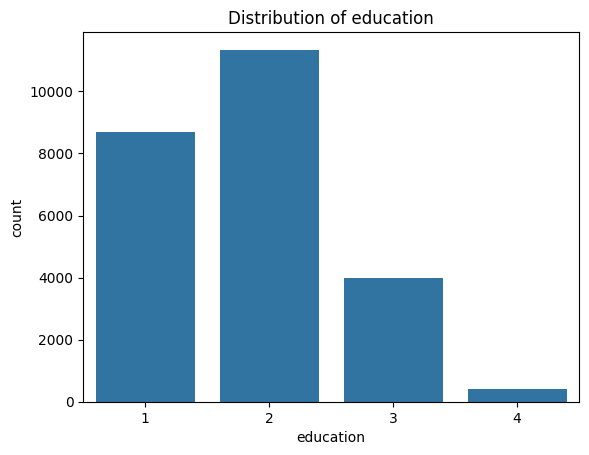

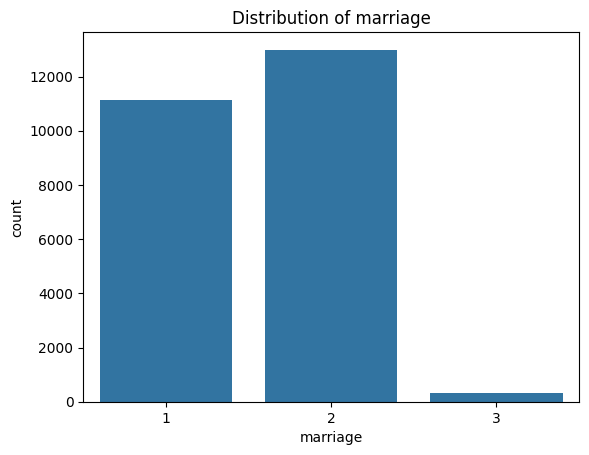

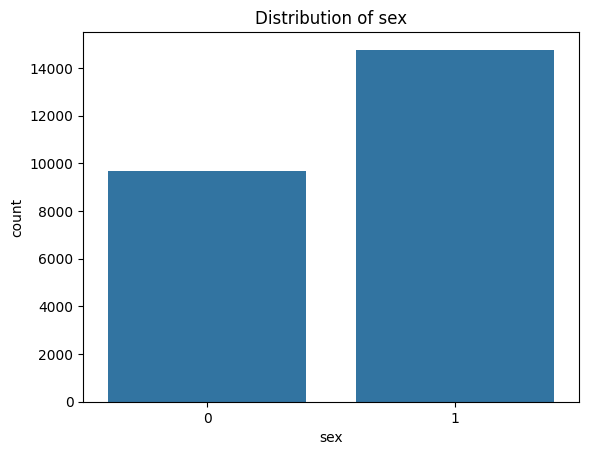

In [16]:
cat_cols = ['education', 'marriage', 'sex']

for col in cat_cols:
    sns.countplot(data=train, x=col)
    plt.title(f'Distribution of {col}')
    plt.show()


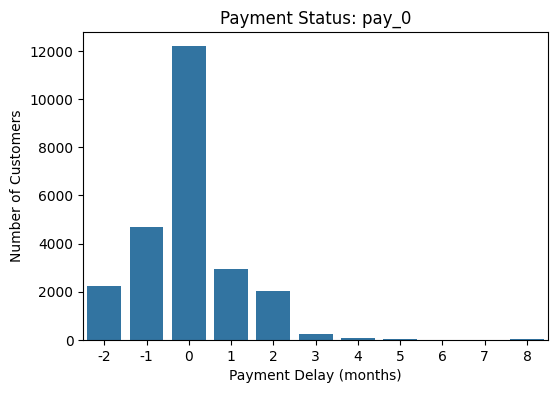

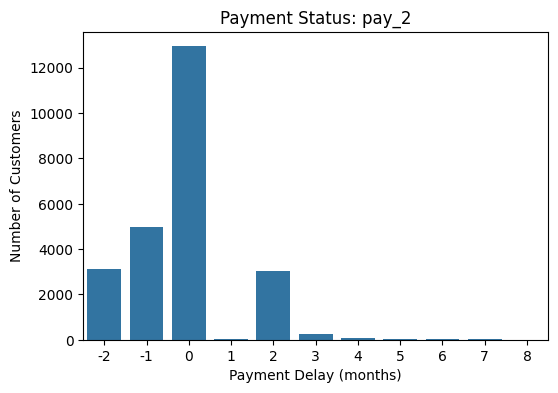

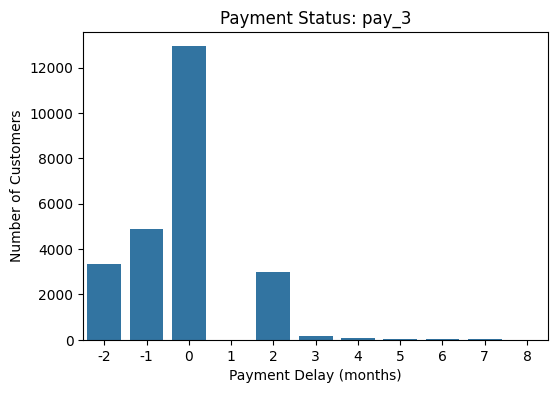

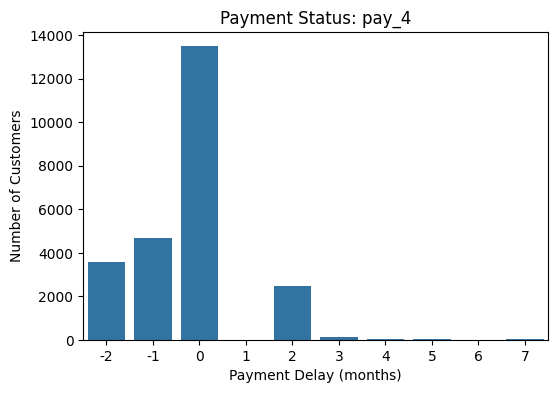

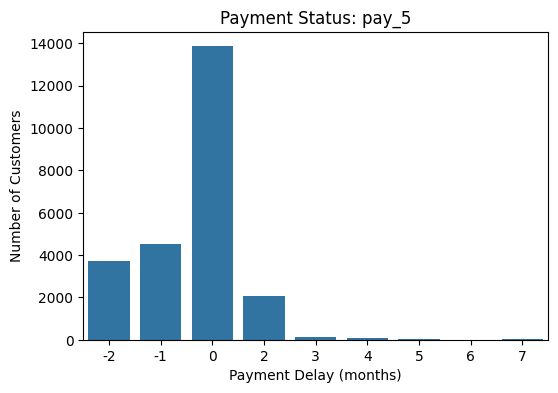

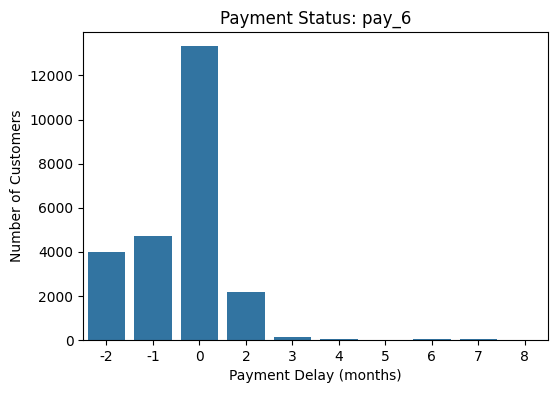

In [17]:
pay_cols = [f'pay_{i}' for i in range(7) if i != 1]

for col in pay_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=train, x=col, order=sorted(train[col].unique()))
    plt.title(f'Payment Status: {col}')
    plt.xlabel('Payment Delay (months)')
    plt.ylabel('Number of Customers')
    plt.show()


Most customers at 0, some at -1 and -2; significant at ‘2’
that implies->

significant at 2 implies that many customer delay payment by 2 months

0 = minimum/partial payment

-1 = full on-time payment

-2 = no bill generated (inactive month)

In [19]:
train.head(6)

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,2,0,2,60000,25.0,2,2,2,0,0,...,20750.63,2000.21,0.00,1134.85,1821.78,1500.03,1500.24,41511.50,0.03,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,1350.30,0.00,0.17,0.00,2700.10,0.00,1349.72,2534.50,0.27,0
2,1,0,2,180000,63.0,0,0,0,0,0,...,52991.51,2086.94,2199.99,1845.66,2000.35,1923.00,1999.78,50422.00,0.04,0
3,1,1,2,210000,43.0,0,0,0,0,0,...,76945.47,3348.07,3380.91,3400.45,2683.97,2744.00,2892.10,86229.50,0.04,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,1.35,999.78,3186.27,45027.78,2100.09,0.01,0.27,11814.33,0.72,0
5,1,1,1,80000,35.0,-1,2,-1,-1,-1,...,3294.93,0.03,3722.62,890.98,661.97,3294.84,1087.51,1946.50,0.83,0


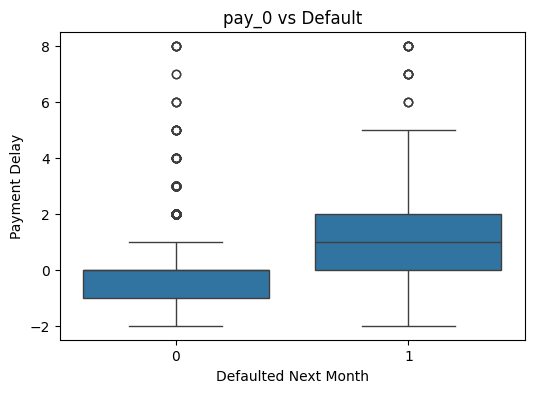

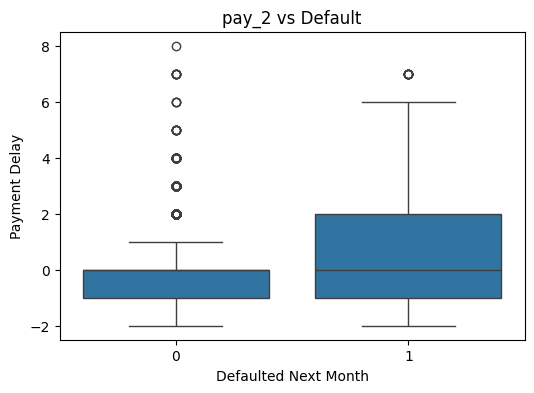

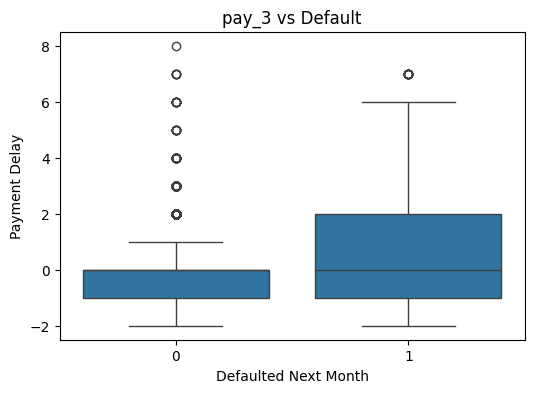

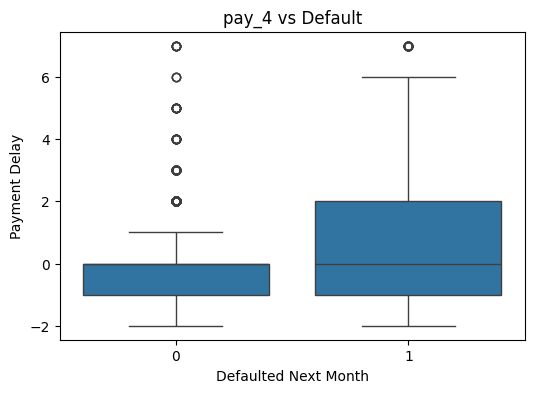

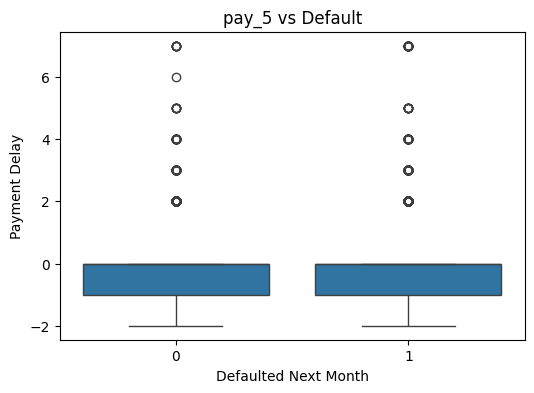

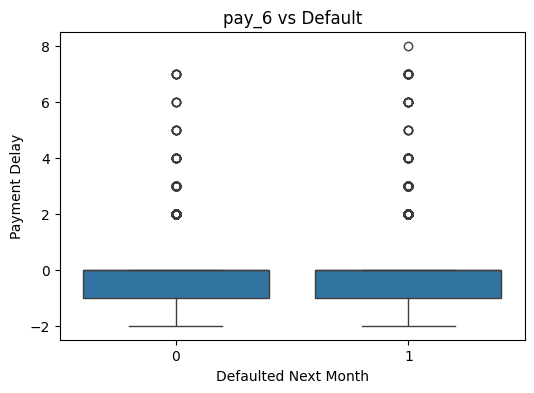

In [20]:
pay_cols = [f'pay_{i}' for i in range(7) if i!=1]

for col in pay_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x='next_month_default', y=col, data=train)
    plt.title(f'{col} vs Default')
    plt.xlabel('Defaulted Next Month')
    plt.ylabel('Payment Delay')
    plt.show()

Defaulters consistently show higher delays in recent months, especially from PAY_0 to PAY_4.

For PAY_5 and PAY_6, the difference between defaulters and non-defaulters is less pronounced,

 likely due to decayed behavioral influence over time.

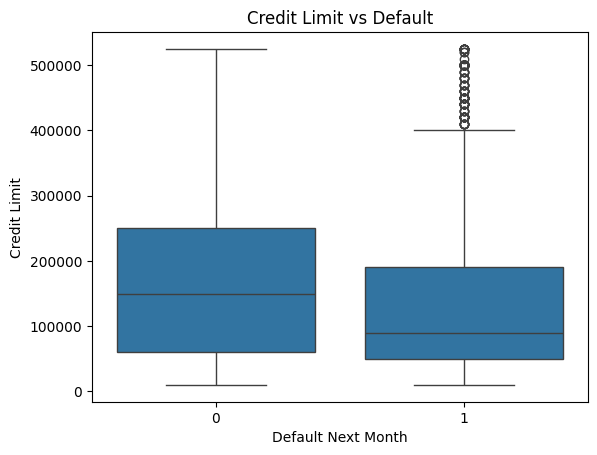

In [23]:
sns.boxplot(x='next_month_default', y='LIMIT_BAL', data=train)
plt.title('Credit Limit vs Default')
plt.xlabel('Default Next Month')
plt.ylabel('Credit Limit')
plt.show()

# If skewed, use log scale
#train['log_LIMIT_BAL'] = np.log1p(train['LIMIT_BAL'])
#sns.boxplot(x='next_month_default', y='LIMIT_BAL', data=train)
#plt.title('Credit Limit vs Default')
#plt.show()


Lower credit limit customers are more likely to default. While the difference isn’t extreme, 
but it is noticeable

In [24]:
def outlier_solution(df,columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        iqr = Q3-Q1
        lower = Q1 - 1.5*iqr
        upper = Q3 + 1.5*iqr
        df[col] = df[col].clip(lower,upper)
    return df
columns= ["age", "LIMIT_BAL",
    "Bill_amt1", "Bill_amt2", "Bill_amt3", "Bill_amt4", "Bill_amt5", "Bill_amt6",
    "pay_amt1", "pay_amt2", "pay_amt3", "pay_amt4", "pay_amt5", "pay_amt6",
    "AVG_Bill_amt"]
train = outlier_solution(train,columns)
train

,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,...,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio,next_month_default
0,2,0,2,60000,25.0,2,2,2,0,0,...,20750.6300,2000.21,0.00,1134.850,1821.78,1500.03000,1500.24,41511.50000,0.03,0
1,2,1,1,290000,24.0,0,0,-2,-2,-1,...,1350.3000,0.00,0.17,0.000,2700.10,0.00000,1349.72,2534.50000,0.27,0
2,1,0,2,180000,60.5,0,0,0,0,0,...,52991.5100,2086.94,2199.99,1845.660,2000.35,1923.00000,1999.78,50422.00000,0.04,0
3,1,1,2,210000,43.0,0,0,0,0,0,...,76945.4700,3348.07,3380.91,3400.450,2683.97,2744.00000,2892.10,86229.50000,0.04,0
4,2,0,1,280000,32.0,-2,-2,-2,-2,-2,...,1.3500,999.78,3186.27,10953.055,2100.09,0.01000,0.27,11814.33000,0.72,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25242,1,1,2,90000,33.0,0,0,0,0,2,...,90042.8700,2800.18,3999.97,8000.090,5347.85,3699.98000,3128.06,82312.50000,0.05,0
25243,1,0,2,60000,49.0,0,0,0,0,0,...,19204.0700,11075.36,2187.56,2501.130,2512.09,4004.89000,2604.22,41371.67000,0.14,1
25244,2,0,1,120000,31.0,-1,-1,-1,-1,-1,...,9834.6400,1315.83,1315.60,533.080,4116.08,9815.08875,7100.12,3071.83000,1.31,1
25245,1,1,4,390000,40.0,0,0,0,0,0,...,121242.6825,7636.03,5652.86,5544.670,5532.37,5859.09000,6818.14,135576.90875,0.03,0


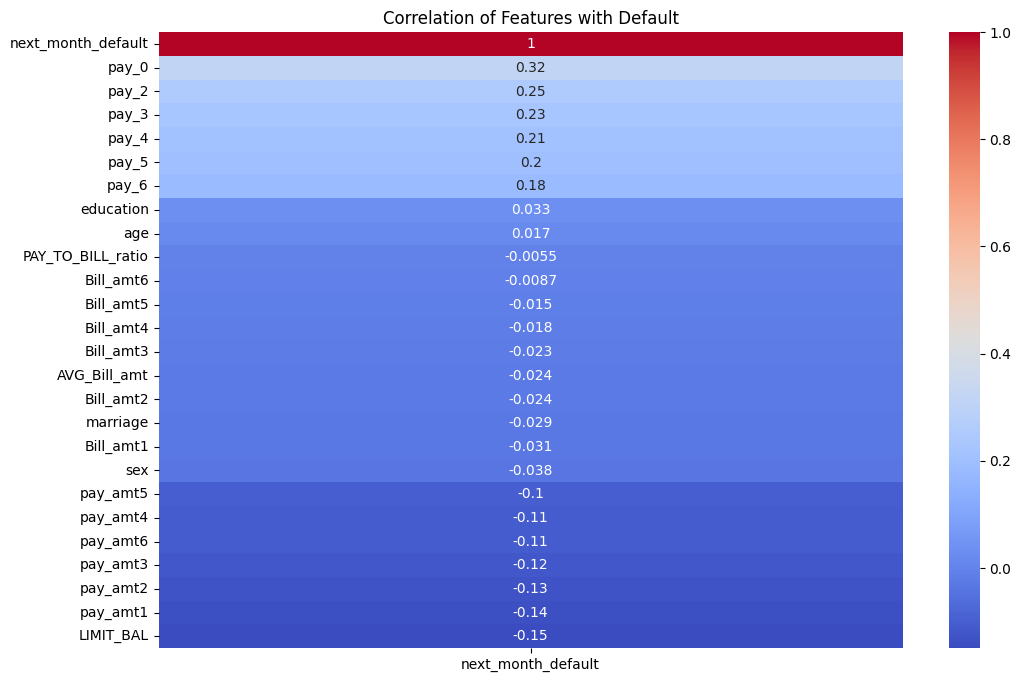

In [25]:
# Compute correlation with target
corr = train.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['next_month_default']].sort_values(by='next_month_default', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Default")
plt.show()


## Financial Behavior anlaysis & Feature Engineering

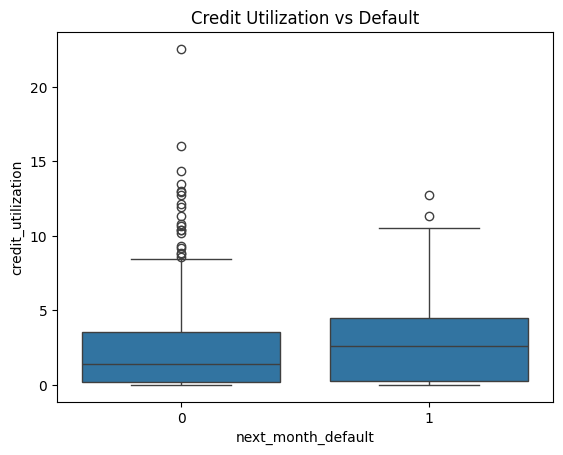

In [26]:
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]

train['total_bill_amt'] = train[bill_cols].sum(axis=1)
train['credit_utilization'] = train['total_bill_amt'] / train['LIMIT_BAL']

sns.boxplot(x='next_month_default', y='credit_utilization', data=train)
plt.title('Credit Utilization vs Default')
plt.show()


Defaulters tend to have higher credit utilization (bill amount vs credit limit), suggesting over-reliance on credit.

However, many non-defaulters also appear as high utilization outliers — indicating that high usage does not always imply default, 

but it's a risk indicator.

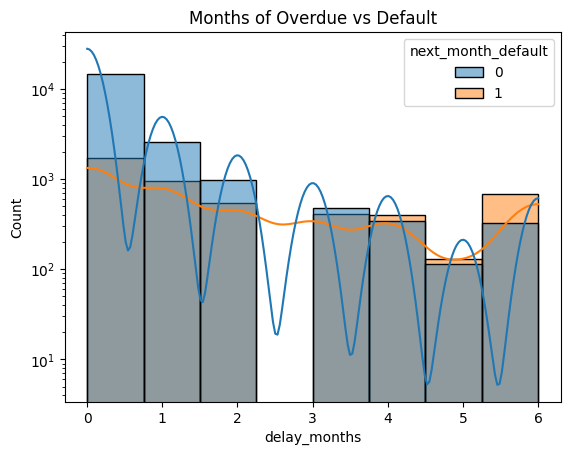

In [27]:
train['delay_months'] = train[[f'pay_{i}' for i in range(7) if i!=1]].apply(lambda row: (row > 0).sum(), axis=1)

# Create the histogram
sns.histplot(data=train, x='delay_months', hue='next_month_default', kde=True, bins=8)
plt.title('Months of Overdue vs Default')
plt.yscale('log')  # <--- This sets the y-axis to log scale
plt.show()


delay_months (count of months with delay > 0) shows:

A decent trend: More delayed months → higher default risk.

Non-defaulters dominate early delay counts but reduce as delay frequency increases

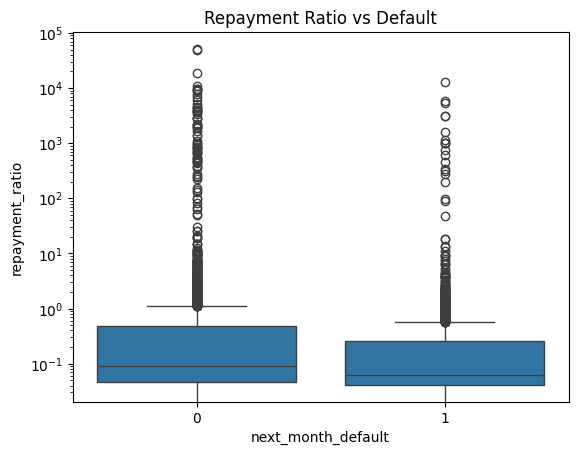

In [29]:
pay_cols = [f'pay_amt{i}' for i in range(1, 7)]
train['total_pay_amt'] = train[pay_cols].sum(axis=1)
train['repayment_ratio'] = train['total_pay_amt'] / train['total_bill_amt'].replace(0, 1)  # avoid division by zero

sns.boxplot(x='next_month_default', y='repayment_ratio', data=train)
plt.title('Repayment Ratio vs Default')
plt.yscale('log')
plt.show()


Defaulters generally have a lower repayment ratio (total payments / total bills).

Non-defaulters show slightly higher consistency in paying back their dues, aligning with expected financial discipline.

In [30]:
pay_status_cols = [f'pay_{i}' for i in range(7) if i!=1]
train['avg_delay'] = train[pay_status_cols].mean(axis=1)

In [31]:
train['payment_consistency'] = train[pay_status_cols].std(axis=1)

In [32]:
def calculate_delinquency_streak(row):
    streak = 0
    max_streak = 0
    for col in pay_status_cols:
        if row[col] > 0:  # Late payment
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0
    return max_streak

train['delinquency_streak'] = train.apply(calculate_delinquency_streak, axis=1)

In [33]:
train=pd.get_dummies(train,columns = ['marriage','sex','education'],drop_first= True)

In [34]:
train.head()

,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,Bill_amt2,...,repayment_ratio,avg_delay,payment_consistency,delinquency_streak,marriage_2,marriage_3,sex_1,education_2,education_3,education_4
0,60000,25.0,2,2,2,0,0,0,60323.86,60728.22,...,0.031947,1.000000,1.095445,3,True,False,False,True,False,False
1,290000,24.0,0,0,-2,-2,-1,0,11157.67,0.00,...,0.266263,-0.833333,0.983192,0,True,False,True,False,False,False
2,180000,60.5,0,0,0,0,0,0,47930.96,48921.91,...,0.039850,0.000000,0.000000,0,False,False,False,True,False,False
3,210000,43.0,0,0,0,0,0,0,91152.44,92916.01,...,0.035660,0.000000,0.000000,0,False,False,True,True,False,False
4,280000,32.0,-2,-2,-2,-2,-2,-2,19666.40,999.04,...,0.243202,-2.000000,0.000000,0,True,False,False,False,False,False


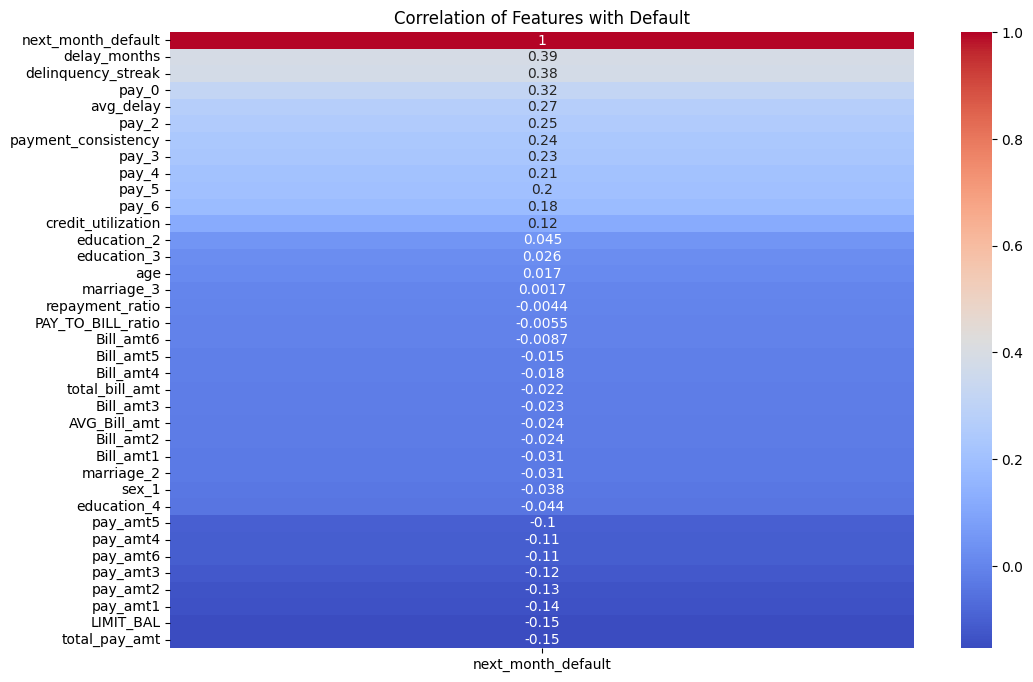

In [35]:
corr = train.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr[['next_month_default']].sort_values(by='next_month_default', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Default")
plt.show()

next_month_default has the highest positive correlation with:

delay_months (0.39)
deliquency_strak(0.38)

PAY_0 to PAY_6 (positive correlations)

Other features like LIMIT_BAL, repayment_ratio, and bill amounts show negative correlations, 

indicating better financial standing reduces default risk.

In [36]:
print(train.isnull().sum())

LIMIT_BAL              0
age                    0
pay_0                  0
pay_2                  0
pay_3                  0
pay_4                  0
pay_5                  0
pay_6                  0
Bill_amt1              0
Bill_amt2              0
Bill_amt3              0
Bill_amt4              0
Bill_amt5              0
Bill_amt6              0
pay_amt1               0
pay_amt2               0
pay_amt3               0
pay_amt4               0
pay_amt5               0
pay_amt6               0
AVG_Bill_amt           0
PAY_TO_BILL_ratio      0
next_month_default     0
total_bill_amt         0
credit_utilization     0
delay_months           0
total_pay_amt          0
repayment_ratio        0
avg_delay              0
payment_consistency    0
delinquency_streak     0
marriage_2             0
marriage_3             0
sex_1                  0
education_2            0
education_3            0
education_4            0
dtype: int64


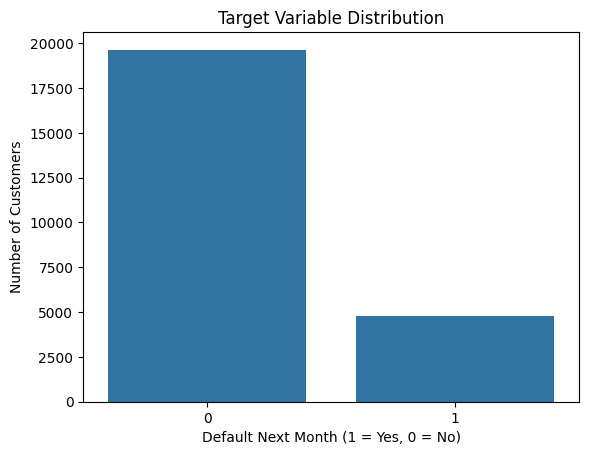

next_month_default
0    0.803346
1    0.196654
Name: proportion, dtype: float64


In [37]:
sns.countplot(data=train, x='next_month_default')
plt.title('Target Variable Distribution')
plt.xlabel('Default Next Month (1 = Yes, 0 = No)')
plt.ylabel('Number of Customers')
plt.show()

# Print class balance
print(train['next_month_default'].value_counts(normalize=True))

In [38]:
drop_cols = [f'Bill_amt{i}' for i in range(1, 7)] + \
            [f'pay_amt{i}' for i in range(1, 7)] + ['total_bill_amt', 'total_pay_amt']
train.drop(columns=drop_cols, inplace=True)


In [39]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import numpy as np

# Define X and y
X = train.drop(columns=['next_month_default'])
y = train['next_month_default']

# Split the original data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(sampling_strategy=0.9, random_state=42)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

# Print class distributions
print(f"Original class distribution: {np.bincount(y_train)}")
print(f"Resampled class distribution: {np.bincount(y_train_sm)}")

Original class distribution: [15709  3846]
Resampled class distribution: [15709 14138]


Applied SMOTE resampling technique , to balance the dataset

In [40]:
columns_to_normalize = [
    'LIMIT_BAL', 'age',
    'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
    'AVG_Bill_amt'
]
scaler = StandardScaler()
X_train_sm[columns_to_normalize] = scaler.fit_transform(X_train_sm[columns_to_normalize])
X_val[columns_to_normalize] = scaler.transform(X_val[columns_to_normalize])


Normalize the columns, so that model treated feature equally and can find 
important feature by itself

In [41]:
print(y_train_sm.shape)
X_train_sm.shape

(29847,)


(29847, 22)

## Evaluation of Models & Thershold Tuning

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, f1_score, confusion_matrix, roc_auc_score, fbeta_score,make_scorer

# Select only numeric columns for scaling
numeric_cols = X.select_dtypes(include=np.number).columns

logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),  
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000))
])

logreg_pipeline.fit(X_train_sm[numeric_cols], y_train_sm)
y_pred_logreg = logreg_pipeline.predict(X_val[numeric_cols])

print("🔹 Logistic Regression")
print(classification_report(y_val, y_pred_logreg))
print("F1 Score:", f1_score(y_val, y_pred_logreg))
print("F2 Score:", fbeta_score(y_val, y_pred_logreg, beta=2))


🔹 Logistic Regression
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      3928
           1       0.40      0.64      0.50       961

    accuracy                           0.74      4889
   macro avg       0.65      0.71      0.66      4889
weighted avg       0.80      0.74      0.76      4889

F1 Score: 0.49578820697954273
F2 Score: 0.5747767857142857


In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc_curve(y_true, y_proba, model_name):
    
    # Calculate ROC AUC score
    auc = roc_auc_score(y_true, y_proba)
    print(f"{model_name} AUC Score: {auc:.4f}")
    
    # Calculate ROC curve data
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    
    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {auc:.2f})', color='blue')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')  # Diagonal line for random guessing
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title(f'ROC Curve for {model_name}')
    plt.legend(loc='lower right')
    plt.grid(True)
    plt.show()


## XGBoost

In [44]:
from xgboost import XGBClassifier

# Compute scale_pos_weight
scale_pos_weight = y_train_sm.value_counts()[0] / y_train_sm.value_counts()[1]

xgb_model = XGBClassifier(scale_pos_weight=scale_pos_weight,
                          use_label_encoder=False,
                          eval_metric='logloss',
                          random_state=42)

xgb_model.fit(X_train_sm, y_train_sm)
y_proba_xgb = xgb_model.predict_proba(X_val)[:, 1]
y_pred_xgb = xgb_model.predict(X_val)

print("🔹 XGBoost")
print(classification_report(y_val, y_pred_xgb))
print("F1 Score:", f1_score(y_val, y_pred_xgb))
print("F2 Score:", fbeta_score(y_val, y_pred_xgb, beta=2))


C:\Users\Acer\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [14:10:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 XGBoost
              precision    recall  f1-score   support

           0       0.86      0.93      0.89      3928
           1       0.56      0.38      0.46       961

    accuracy                           0.82      4889
   macro avg       0.71      0.65      0.67      4889
weighted avg       0.80      0.82      0.81      4889

F1 Score: 0.45561762880198636
F2 Score: 0.4083222073876279


In [45]:
from sklearn.metrics import f1_score, precision_score, recall_score

thresholds = np.arange(0.1, 0.9, 0.01)

f1s = []
f2s = []
precisions = []
recalls = []

for t in thresholds:
    y_pred_thresh = (y_proba_xgb >= t).astype(int)
    precisions.append(precision_score(y_val, y_pred_thresh))
    recalls.append(recall_score(y_val, y_pred_thresh))
    f1s.append(f1_score(y_val, y_pred_thresh))
    f2s.append(fbeta_score(y_val, y_pred_thresh, beta=2))


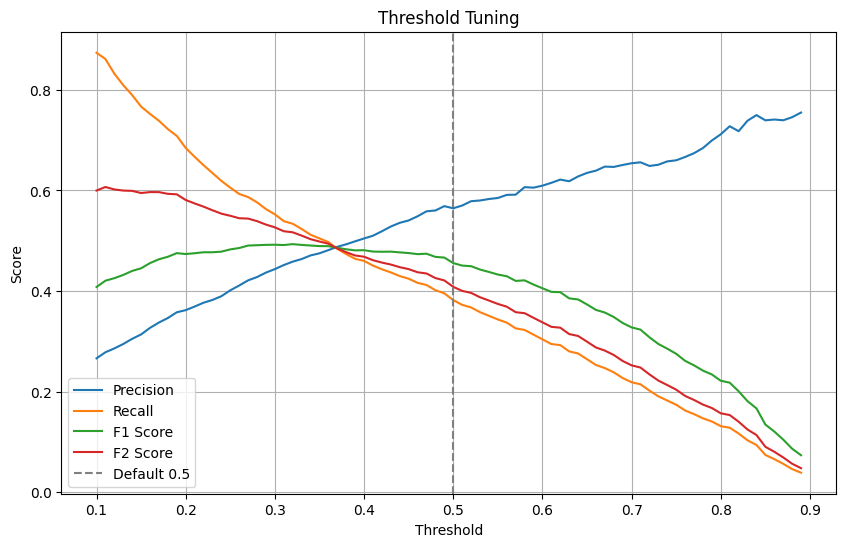

In [46]:
plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1 Score')
plt.plot(thresholds, f2s, label='F2 Score')
plt.axvline(0.5, color='gray', linestyle='--', label='Default 0.5')
plt.title('Threshold Tuning')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [47]:
best_f2_idx = np.argmax(f2s)
best_threshold = thresholds[best_f2_idx]
print(f"Best F2 Score: {f2s[best_f2_idx]:.4f} at threshold {best_threshold:.2f}")


Best F2 Score: 0.6069 at threshold 0.11


              precision    recall  f1-score   support

           0       0.93      0.45      0.61      3928
           1       0.28      0.86      0.42       961

    accuracy                           0.53      4889
   macro avg       0.60      0.66      0.51      4889
weighted avg       0.80      0.53      0.57      4889



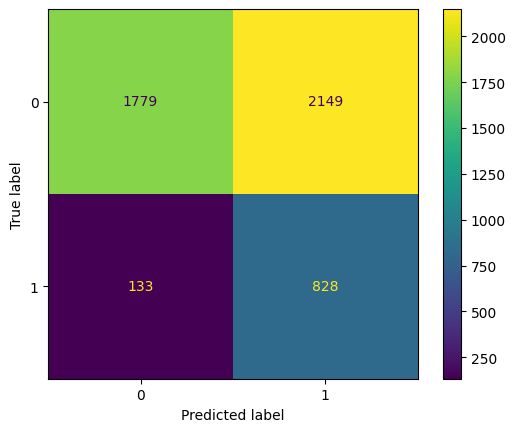

In [48]:

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
y_pred_final = (y_proba_xgb >= best_threshold).astype(int)

print(classification_report(y_val, y_pred_final))
conf_matrix = confusion_matrix(y_val, y_pred_final)
ConfusionMatrixDisplay(conf_matrix).plot()


XGBoost AUC Score: 0.7588


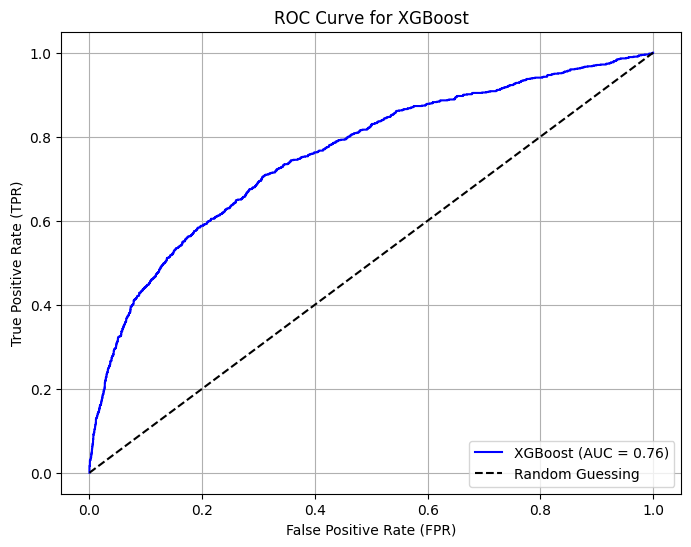

In [49]:
plot_roc_curve(y_val, y_proba_xgb, 'XGBoost')

## Random forest

In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train_sm, y_train_sm)

y_proba_rf=rf_model.predict_proba(X_val)[:, 1]
y_pred_rf = rf_model.predict(X_val)

print("🔹 Random Forest")
print(classification_report(y_val, y_pred_rf))
print("F1 Score:", f1_score(y_val, y_pred_rf))
print("F2 Score:", fbeta_score(y_val, y_pred_rf, beta=2))


🔹 Random Forest
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      3928
           1       0.56      0.39      0.46       961

    accuracy                           0.82      4889
   macro avg       0.71      0.66      0.67      4889
weighted avg       0.80      0.82      0.81      4889

F1 Score: 0.4583333333333333
F2 Score: 0.4141749723145072


In [51]:
from sklearn.metrics import f1_score, precision_score, recall_score

thresholds = np.arange(0.1, 0.9, 0.01)

f1s = []
f2s = []
precisions = []
recalls = []

for t in thresholds:
    y_pred_thresh = (y_proba_rf >= t).astype(int)
    precisions.append(precision_score(y_val, y_pred_thresh))
    recalls.append(recall_score(y_val, y_pred_thresh))
    f1s.append(f1_score(y_val, y_pred_thresh))
    f2s.append(fbeta_score(y_val, y_pred_thresh, beta=2))


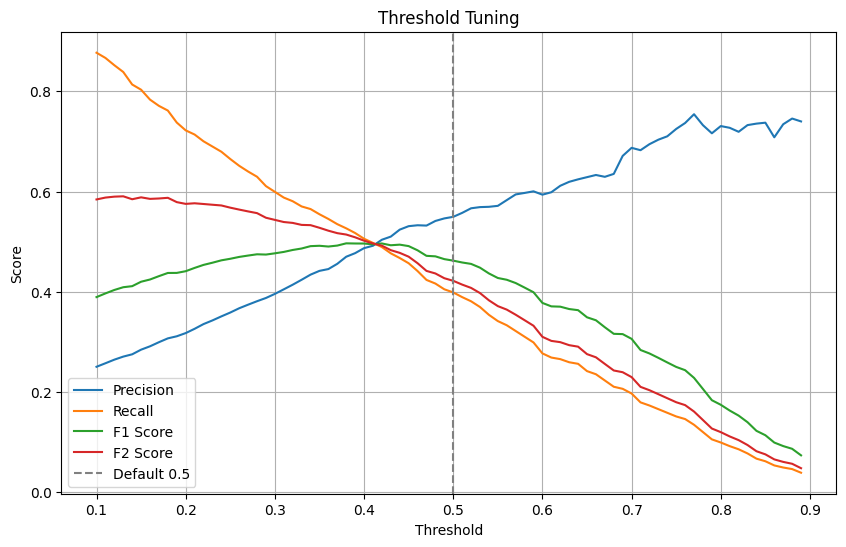

In [52]:
plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1 Score')
plt.plot(thresholds, f2s, label='F2 Score')
plt.axvline(0.5, color='gray', linestyle='--', label='Default 0.5')
plt.title('Threshold Tuning')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [53]:
best_f2_idx = np.argmax(f2s)
best_threshold = thresholds[best_f2_idx]
print(f"Best F2 Score: {f2s[best_f2_idx]:.4f} at threshold {best_threshold:.2f}")


Best F2 Score: 0.5905 at threshold 0.13


              precision    recall  f1-score   support

           0       0.92      0.45      0.60      3928
           1       0.27      0.84      0.41       961

    accuracy                           0.52      4889
   macro avg       0.59      0.64      0.50      4889
weighted avg       0.79      0.52      0.56      4889



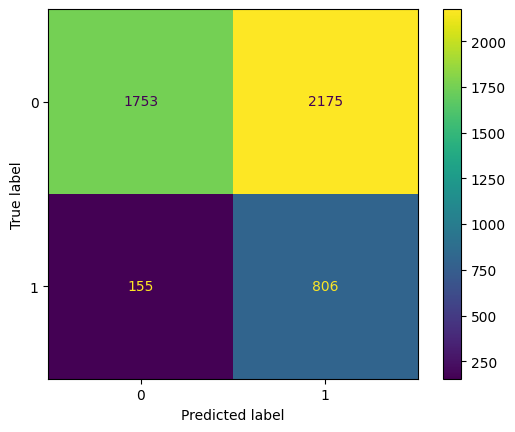

In [54]:
# Apply threshold for final prediction
y_pred_final = (y_proba_rf >= best_threshold).astype(int)

# Evaluate
print(classification_report(y_val, y_pred_final))
conf_matrix = confusion_matrix(y_val, y_pred_final)
ConfusionMatrixDisplay(conf_matrix).plot()


RandomForest AUC Score: 0.7498


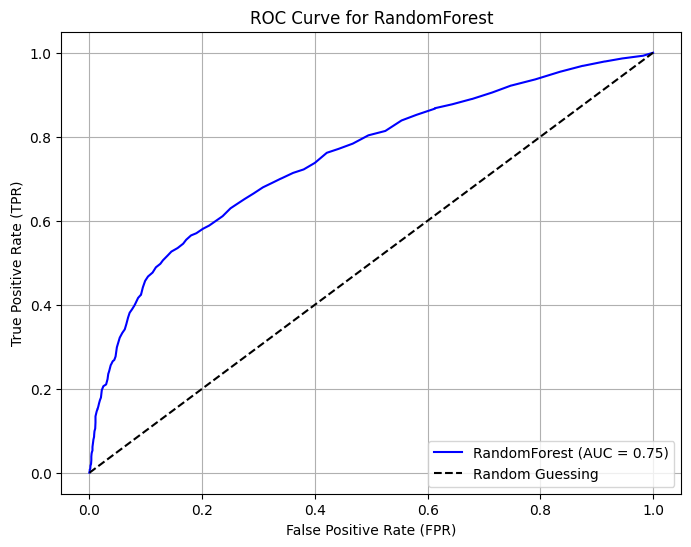

In [55]:
plot_roc_curve(y_val, y_proba_rf, 'RandomForest')

## Light GBM

In [56]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(class_weight='balanced', random_state=42)
lgb_model.fit(X_train_sm, y_train_sm)
y_proba_lgb=lgb_model.predict_proba(X_val)[:, 1]
y_pred_lgb = lgb_model.predict(X_val)

print("🔹 LightGBM")
print(classification_report(y_val, y_pred_lgb))
print("F1 Score:", f1_score(y_val, y_pred_lgb))
print("F2 Score:", fbeta_score(y_val, y_pred_lgb, beta=2))


[LightGBM] [Info] Number of positive: 14138, number of negative: 15709
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002572 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2071
[LightGBM] [Info] Number of data points in the train set: 29847, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
🔹 LightGBM
              precision    recall  f1-score   support

           0       0.87      0.92      0.90      3928
           1       0.58      0.43      0.50       961

    accuracy                           0.83      4889
   macro avg       0.73      0.68      0.70      4889
weighted avg       0.81      0.83      0.82      4889

F1 Score: 0.49521531100478466
F2 Score: 0.4544456641053787


In [57]:
from sklearn.metrics import f1_score, precision_score, recall_score

thresholds = np.arange(0.1, 0.9, 0.01)

f1s = []
f2s = []
precisions = []
recalls = []

for t in thresholds:
    y_pred_thresh = (y_proba_lgb>= t).astype(int)
    precisions.append(precision_score(y_val, y_pred_thresh))
    recalls.append(recall_score(y_val, y_pred_thresh))
    f1s.append(f1_score(y_val, y_pred_thresh))
    f2s.append(fbeta_score(y_val, y_pred_thresh, beta=2))


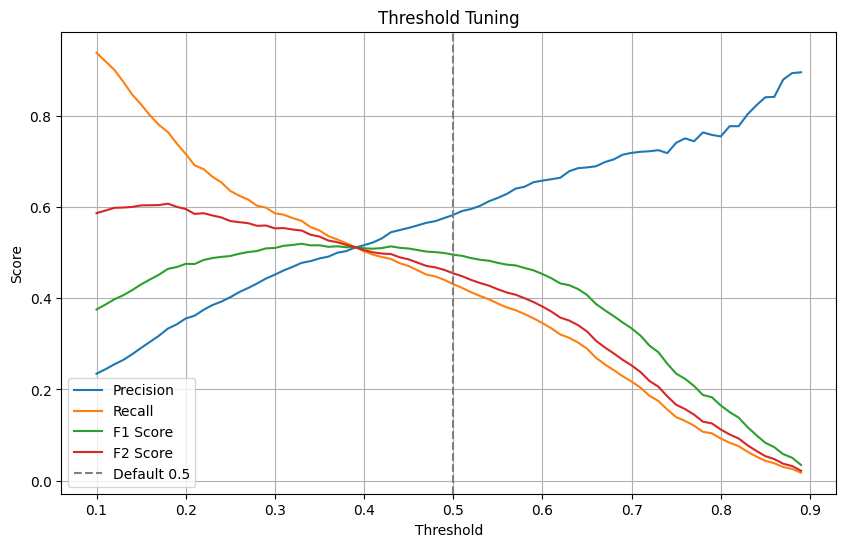

In [58]:
plt.figure(figsize=(10,6))
plt.plot(thresholds, precisions, label='Precision')
plt.plot(thresholds, recalls, label='Recall')
plt.plot(thresholds, f1s, label='F1 Score')
plt.plot(thresholds, f2s, label='F2 Score')
plt.axvline(0.5, color='gray', linestyle='--', label='Default 0.5')
plt.title('Threshold Tuning')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


In [59]:
best_f2_idx = np.argmax(f2s)
best_threshold = thresholds[best_f2_idx]
print(f"Best F2 Score: {f2s[best_f2_idx]:.4f} at threshold {best_threshold:.2f}")


Best F2 Score: 0.6070 at threshold 0.18


              precision    recall  f1-score   support

           0       0.92      0.63      0.74      3928
           1       0.33      0.76      0.46       961

    accuracy                           0.65      4889
   macro avg       0.62      0.70      0.60      4889
weighted avg       0.80      0.65      0.69      4889



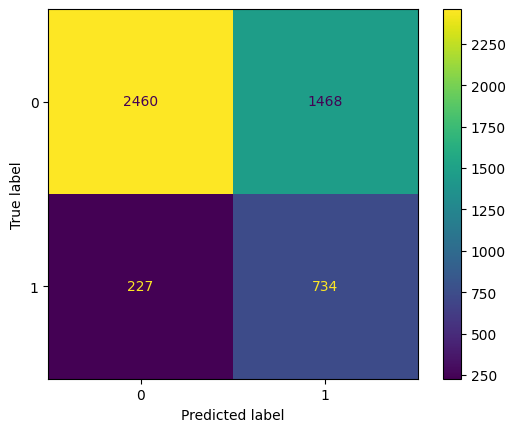

In [60]:
# Apply threshold for final prediction
y_pred_final = (y_proba_lgb >= best_threshold).astype(int)

# Evaluate
print(classification_report(y_val, y_pred_final))
conf_matrix = confusion_matrix(y_val, y_pred_final)
ConfusionMatrixDisplay(conf_matrix).plot()


LightGBM AUC Score: 0.7721


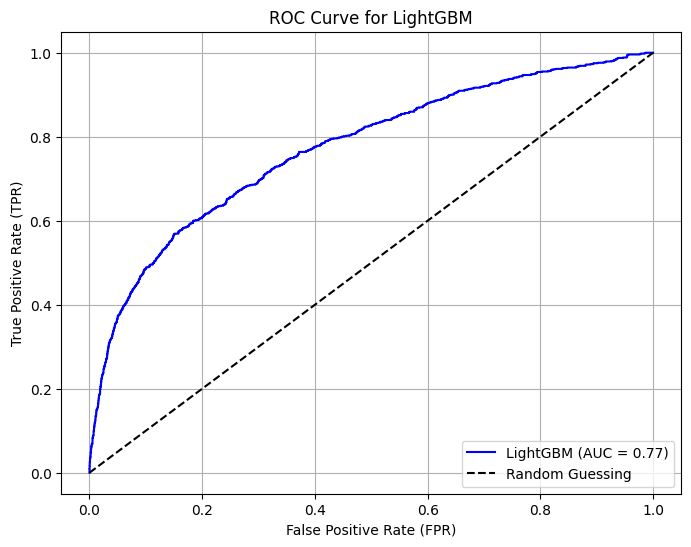

In [61]:
plot_roc_curve(y_val, y_proba_lgb, 'LightGBM')

In a credit risk context, False Negatives (missed defaulters) lead to actual financial loss. 
On the other hand, False Positives may trigger unnecessary alerts or credit limits, but don't cause monetary damage.

Thus, we selected a classification threshold of 0.14, which maximizes the F2 score — placing more weight on Recall. This ensures the model prioritizes catching defaulters, aligning with the bank’s risk mitigation strategy.

# Final model and prediction on Validation dataset

### best model is XG_Boost so we are gonna use its best threshold for making predictions

In [114]:
best_threshold_xgb=0.11


In [115]:
df=pd.read_csv("D:\\study\\sem5\\Summer\\Finclub\\Datasets_final\\validate_dataset_final.csv")

In [116]:
df.head()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32,0,0,0,0,...,17831.13,15670.47,2000.03,3999.90,1419.80,1999.97,3000.21,30788.71,23456.33,0.31
1,2,2,0,1,350000,35,-1,-1,-1,0,...,10832.78,2261.45,33891.01,16267.19,4026.80,234.10,1565.11,26346.39,13660.33,1.00
2,3,2,1,1,310000,39,0,0,0,0,...,240520.57,246524.45,11026.94,10499.83,14000.32,10000.12,10000.16,10000.21,258034.17,0.04
3,4,1,0,2,20000,47,0,0,0,2,...,15040.17,14749.97,1200.00,2799.83,0.14,1499.93,0.02,1000.26,13333.33,0.08
4,5,2,1,2,500000,30,0,0,0,0,...,69054.15,64841.30,25463.94,43095.31,7521.96,9065.17,8841.07,12000.21,77204.50,0.23


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5016 entries, 0 to 5015
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Customer_ID        5016 non-null   int64  
 1   marriage           5016 non-null   int64  
 2   sex                5016 non-null   int64  
 3   education          5016 non-null   int64  
 4   LIMIT_BAL          5016 non-null   int64  
 5   age                5016 non-null   int64  
 6   pay_0              5016 non-null   int64  
 7   pay_2              5016 non-null   int64  
 8   pay_3              5016 non-null   int64  
 9   pay_4              5016 non-null   int64  
 10  pay_5              5016 non-null   int64  
 11  pay_6              5016 non-null   int64  
 12  Bill_amt1          5016 non-null   float64
 13  Bill_amt2          5016 non-null   float64
 14  Bill_amt3          5016 non-null   float64
 15  Bill_amt4          5016 non-null   float64
 16  Bill_amt5          5016 

In [118]:
print("\nDuplicate Rows:", df.duplicated().sum())


Duplicate Rows: 0


In [119]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Customer_ID          0
marriage             0
sex                  0
education            0
LIMIT_BAL            0
age                  0
pay_0                0
pay_2                0
pay_3                0
pay_4                0
pay_5                0
pay_6                0
Bill_amt1            0
Bill_amt2            0
Bill_amt3            0
Bill_amt4            0
Bill_amt5            0
Bill_amt6            0
pay_amt1             0
pay_amt2             0
pay_amt3             0
pay_amt4             0
pay_amt5             0
pay_amt6             0
AVG_Bill_amt         0
PAY_TO_BILL_ratio    0
dtype: int64


In [120]:
categorical_cols = ['sex', 'education', 'marriage']
for col in categorical_cols:
    print(f"{col} unique values: {df[col].unique()}")

sex unique values: [1 0]
education unique values: [2 1 3 4 5 0 6]
marriage unique values: [1 2 3 0]


In [121]:
df['education'] = df['education'].replace([0, 5, 6], 4)
df['marriage'] = df['marriage'].replace(0, 3)
df.tail()

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
5011,5012,1,0,2,240000,51,0,0,0,0,...,106832.47,109060.11,3591.87,3718.80,3797.93,3820.66,3949.01,3976.22,103737.83,0.04
5012,5013,1,1,3,60000,33,0,0,0,0,...,29062.53,28862.41,2100.23,3000.32,1499.86,1499.82,1099.82,1100.18,41858.83,0.04
5013,5014,1,0,1,290000,36,1,-2,-1,-1,...,16725.60,17427.88,0.00,568.10,16165.93,1000.03,1000.05,1000.15,8481.17,0.39
5014,5015,1,1,2,120000,28,0,0,0,0,...,75710.06,77502.18,3283.48,2999.75,5000.26,3000.13,2999.95,4000.04,84492.00,0.04
5015,5016,2,1,1,100000,24,0,0,0,0,...,14718.27,29426.58,1552.85,4999.62,87.25,14760.83,29513.97,330.11,27439.33,0.31


In [122]:
def outlier_solution(df,columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        iqr = Q3-Q1
        lower = Q1 - 1.5*iqr
        upper = Q3 + 1.5*iqr
        df[col] = df[col].clip(lower,upper)
    return df
columns= ["age", "LIMIT_BAL",
    "Bill_amt1", "Bill_amt2", "Bill_amt3", "Bill_amt4", "Bill_amt5", "Bill_amt6",
    "pay_amt1", "pay_amt2", "pay_amt3", "pay_amt4", "pay_amt5", "pay_amt6",
    "AVG_Bill_amt"]
df= outlier_solution(df,columns)
df

,Customer_ID,marriage,sex,education,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,...,Bill_amt5,Bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,AVG_Bill_amt,PAY_TO_BILL_ratio
0,1,1,1,2,220000,32.0,0,0,0,0,...,17831.13000,15670.4700,2000.03000,3999.90000,1419.80000,1999.97000,3000.2100,9765.66375,23456.3300,0.31
1,2,2,0,1,350000,35.0,-1,-1,-1,0,...,10832.78000,2261.4500,11073.69125,11015.94875,4026.80000,234.10000,1565.1100,9765.66375,13660.3300,1.00
2,3,2,1,1,310000,39.0,0,0,0,0,...,122804.53875,120868.5975,11026.94000,10499.83000,11604.82125,10000.12000,9795.3475,9765.66375,134075.3525,0.04
3,4,1,0,2,20000,47.0,0,0,0,2,...,15040.17000,14749.9700,1200.00000,2799.83000,0.14000,1499.93000,0.0200,1000.26000,13333.3300,0.08
4,5,2,1,2,500000,30.0,0,0,0,0,...,69054.15000,64841.3000,11073.69125,11015.94875,7521.96000,9065.17000,8841.0700,9765.66375,77204.5000,0.23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5011,5012,1,0,2,240000,51.0,0,0,0,0,...,106832.47000,109060.1100,3591.87000,3718.80000,3797.93000,3820.66000,3949.0100,3976.22000,103737.8300,0.04
5012,5013,1,1,3,60000,33.0,0,0,0,0,...,29062.53000,28862.4100,2100.23000,3000.32000,1499.86000,1499.82000,1099.8200,1100.18000,41858.8300,0.04
5013,5014,1,0,1,290000,36.0,1,-2,-1,-1,...,16725.60000,17427.8800,0.00000,568.10000,11604.82125,1000.03000,1000.0500,1000.15000,8481.1700,0.39
5014,5015,1,1,2,120000,28.0,0,0,0,0,...,75710.06000,77502.1800,3283.48000,2999.75000,5000.26000,3000.13000,2999.9500,4000.04000,84492.0000,0.04


In [123]:
bill_cols = [f'Bill_amt{i}' for i in range(1, 7)]

df['total_bill_amt'] = df[bill_cols].sum(axis=1)
df['credit_utilization'] = df['total_bill_amt'] / train['LIMIT_BAL']



In [124]:
df['delay_months'] = df[[f'pay_{i}' for i in range(7) if i!=1]].apply(lambda row: (row > 0).sum(), axis=1)


In [125]:
pay_cols = [f'pay_amt{i}' for i in range(1, 7)]
df['total_pay_amt'] = df[pay_cols].sum(axis=1)
df['repayment_ratio'] = df['total_pay_amt'] / df['total_bill_amt'].replace(0, 1)  # avoid division by zero



In [126]:
pay_status_cols = [f'pay_{i}' for i in range(7) if i!=1]
df['avg_delay'] = df[pay_status_cols].mean(axis=1)

In [127]:
df['payment_consistency'] = df[pay_status_cols].std(axis=1)

In [128]:
def calculate_delinquency_streak(row):
    streak = 0
    max_streak = 0
    for col in pay_status_cols:
        if row[col] > 0:  # Late payment
            streak += 1
            max_streak = max(max_streak, streak)
        else:
            streak = 0
    return max_streak

df['delinquency_streak'] = df.apply(calculate_delinquency_streak, axis=1)

In [129]:
df=pd.get_dummies(df,columns = ['marriage','sex','education'],drop_first= True)

In [130]:
df.head(7)

,Customer_ID,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,...,repayment_ratio,avg_delay,payment_consistency,delinquency_streak,marriage_2,marriage_3,sex_1,education_2,education_3,education_4
0,1,220000,32.0,0,0,0,0,0,0,28853.10,...,0.157637,0.0,0.000000,0,False,False,True,True,False,False
1,2,350000,35.0,-1,-1,-1,0,0,0,4438.78,...,0.459747,-0.5,0.547723,0,True,False,False,False,False,False
2,3,310000,39.0,0,0,0,0,0,0,164096.53,...,0.074219,0.0,0.000000,0,True,False,True,False,False,False
3,4,20000,47.0,0,0,0,2,2,2,10628.45,...,0.081253,1.0,1.095445,3,False,False,False,True,False,False
4,5,500000,30.0,0,0,0,0,0,0,98617.77,...,0.123662,0.0,0.000000,0,True,False,True,True,False,False
5,6,180000,52.0,0,0,0,0,0,0,164096.53,...,0.040144,0.0,0.000000,0,True,False,True,False,True,False
6,7,50000,36.0,0,0,0,0,0,0,47605.35,...,0.041966,0.0,0.000000,0,False,False,False,True,False,False


In [132]:
columns_for_scaling = [
    'LIMIT_BAL', 'age',
    'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6',
    'AVG_Bill_amt'
]
X_test = df

X_test[columns_for_scaling] = scaler.transform(X_test[columns_for_scaling])
X_test.describe()


,Customer_ID,LIMIT_BAL,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,Bill_amt1,...,AVG_Bill_amt,PAY_TO_BILL_ratio,total_bill_amt,credit_utilization,delay_months,total_pay_amt,repayment_ratio,avg_delay,payment_consistency,delinquency_streak
count,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,...,5016.000000,5016.000000,5016.000000,4985.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000,5016.000000
mean,2508.500000,-1.240331,-4.084719,-0.264648,-0.127979,-0.069074,-0.011318,0.042410,0.051756,45075.167568,...,-0.887722,0.417159,232983.033482,3.350743,0.799442,18428.705901,7.126839,-0.198797,0.445964,0.760965
std,1448.138806,0.000008,0.120329,0.914793,0.828028,0.833316,0.815787,0.848462,0.824372,52609.111512,...,0.000024,13.729586,261589.866293,7.403129,1.506003,15520.902092,187.805845,0.958368,0.507288,1.462758
min,1.000000,-1.240341,-4.274235,-1.878390,-1.419350,-1.357132,-1.285875,-1.282981,-1.205542,0.000000,...,-0.887749,-546.930000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000,0.000000,0.000000
25%,1254.750000,-1.240339,-4.181786,-1.058690,-0.716875,-0.646205,-0.563727,-0.519088,-0.460872,3303.880000,...,-0.887741,0.040000,29527.660000,0.206772,0.000000,6618.407500,0.046040,-0.833333,0.000000,0.000000
50%,2508.500000,-1.240333,-4.102545,-0.238991,-0.014401,0.064721,0.158421,0.244805,0.283798,22445.680000,...,-0.887732,0.090000,125558.203750,0.979936,0.000000,13734.596875,0.081562,0.000000,0.408248,0.000000
75%,3762.250000,-1.240326,-4.006795,-0.238991,-0.014401,0.064721,0.158421,0.244805,0.283798,67620.940000,...,-0.887712,0.570000,333972.267500,3.248853,1.000000,26652.677812,0.443269,0.000000,0.836660,1.000000
max,5016.000000,-1.240308,-3.744308,6.318602,4.902918,5.041208,5.213459,5.592052,5.496487,164096.530000,...,-0.887670,797.000000,844701.680000,84.470168,6.000000,63544.588750,9525.904762,5.500000,3.204164,6.000000


In [133]:
drop_cols = [f'Bill_amt{i}' for i in range(1, 7)] + \
            [f'pay_amt{i}' for i in range(1, 7)] + ['total_bill_amt', 'total_pay_amt']
df.drop(columns=drop_cols, inplace=True)


In [138]:
customer_ids = X_test['Customer_ID'].copy()
X_test_for_pred = X_test.drop(columns=['Customer_ID'])

y_proba_test = xgb_model.predict_proba(X_test_for_pred)[:, 1]

y_pred_test = (y_proba_test > best_threshold_xgb).astype(int)

submission_df = pd.DataFrame({
    'Customer_ID': customer_ids,
    'Predicted_Default': y_pred_test
})

submission_df.to_csv("submission_2312403.csv", index=False)

print(submission_df.head(10))

   Customer_ID  Predicted_Default
0            1                  1
1            2                  0
2            3                  0
3            4                  1
4            5                  1
5            6                  0
6            7                  1
7            8                  1
8            9                  0
9           10                  0


In [139]:
import numpy as np

counts = np.bincount(y_pred_test)

# Print the counts
print("Count of 0s (non-default):", counts[0])
print("Count of 1s (default):", counts[1])
print("Total predictions:", len(y_pred_test))

Count of 0s (non-default): 1744
Count of 1s (default): 3272
Total predictions: 5016
